# Credit Card Fraud EDA
This notebook performs detailed exploratory data analysis (EDA) on the Kaggle Credit Card Fraud dataset to uncover insights beyond formal modeling.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Load dataset
df = pd.read_csv('creditcard.csv')
# Feature engineering
df['LogAmount'] = np.log1p(df['Amount'])

## 1. Missing Values & Summary Statistics

In [5]:
print('Missing values per column:')
print(df.isnull().sum())
print('\nSummary statistics:')
print(df.describe())

Missing values per column:
Time         0
V1           0
V2           0
V3           0
V4           0
V5           0
V6           1
V7           1
V8           1
V9           1
V10          1
V11          1
V12          1
V13          1
V14          1
V15          1
V16          1
V17          1
V18          1
V19          1
V20          1
V21          1
V22          1
V23          1
V24          1
V25          1
V26          1
V27          1
V28          1
Amount       1
Class        1
LogAmount    1
dtype: int64

Summary statistics:
               Time            V1            V2            V3            V4  \
count  45646.000000  45646.000000  45646.000000  45646.000000  45646.000000   
mean   27545.441331     -0.237544      0.028942      0.696718      0.191505   
std    12907.770469      1.886548      1.613070      1.530553      1.403936   
min        0.000000    -56.407510    -72.715728    -32.965346     -5.172595   
25%    19891.000000     -0.985248     -0.543868      0.222804   

## 2. Class Distribution

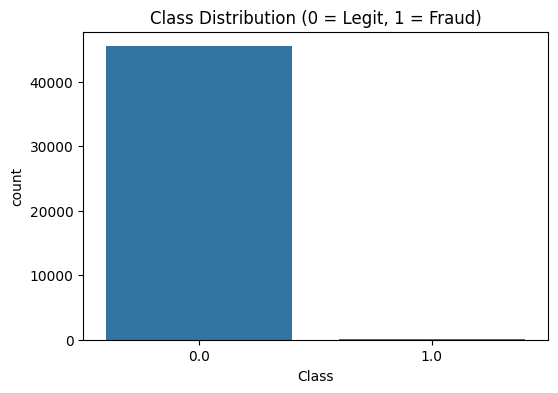

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Legit, 1 = Fraud)')
plt.show()

## 3. Distribution of Log(Amount)

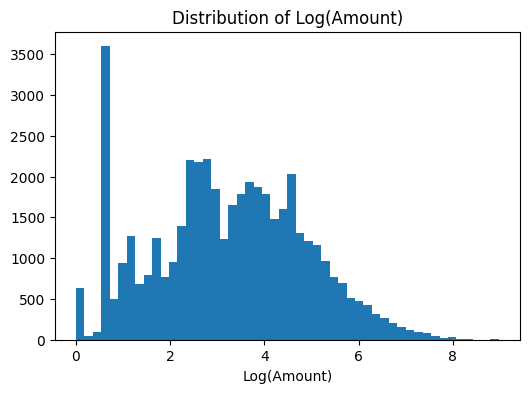

In [7]:
plt.figure(figsize=(6,4))
plt.hist(df['LogAmount'], bins=50)
plt.title('Distribution of Log(Amount)')
plt.xlabel('Log(Amount)')
plt.show()

## 4. Distribution of Transaction Time

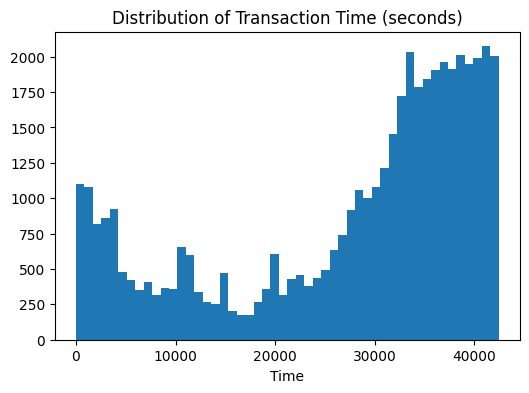

In [8]:
plt.figure(figsize=(6,4))
plt.hist(df['Time'], bins=50)
plt.title('Distribution of Transaction Time (seconds)')
plt.xlabel('Time')
plt.show()

## 5. Boxplot of Log(Amount) by Class

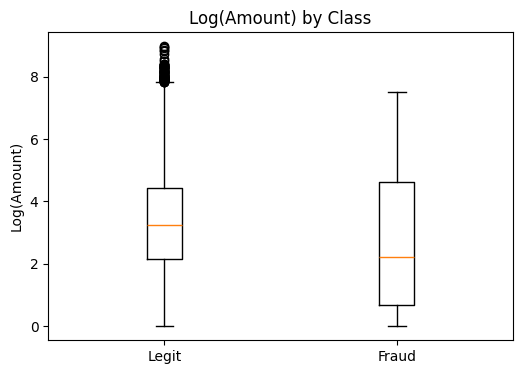

In [9]:
legit = df[df['Class']==0]['LogAmount']
legit = df[df['Class']==0]['LogAmount']
fraud = df[df['Class']==1]['LogAmount']
plt.figure(figsize=(6,4))
plt.boxplot([legit, fraud], tick_labels=['Legit', 'Fraud'])
plt.title('Log(Amount) by Class')
plt.ylabel('Log(Amount)')
plt.show()
plt.show()

## 6. Top 10 Features by Absolute Correlation with Class

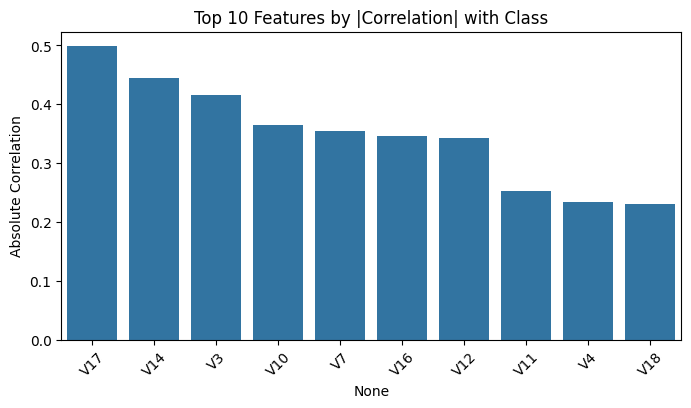

In [10]:
corr = df.corr()['Class'].abs().drop('Class')
top10 = corr.sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top10.index, y=top10.values)
plt.title('Top 10 Features by |Correlation| with Class')
plt.xticks(rotation=45)
plt.ylabel('Absolute Correlation')
plt.show()

## 7. Mean Feature Values by Class for Top Features

<Figure size 800x600 with 0 Axes>

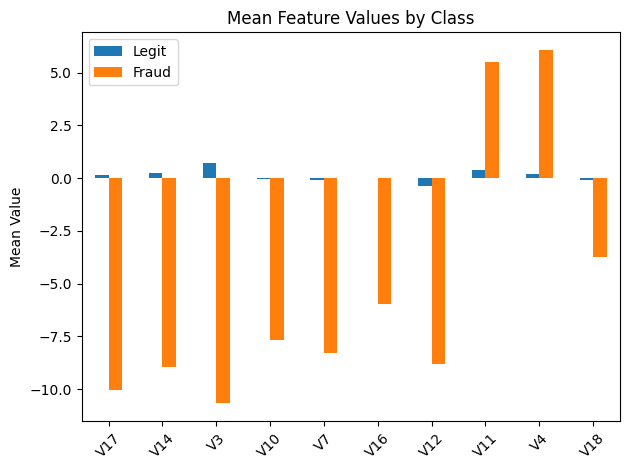

In [11]:
top_feats = top10.index.tolist()
means = df.groupby('Class')[top_feats].mean().T
plt.figure(figsize=(8,6))
means.plot(kind='bar')
plt.title('Mean Feature Values by Class')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(['Legit','Fraud'])
plt.tight_layout()
plt.show()

## 8. Transactions per Hour by Class

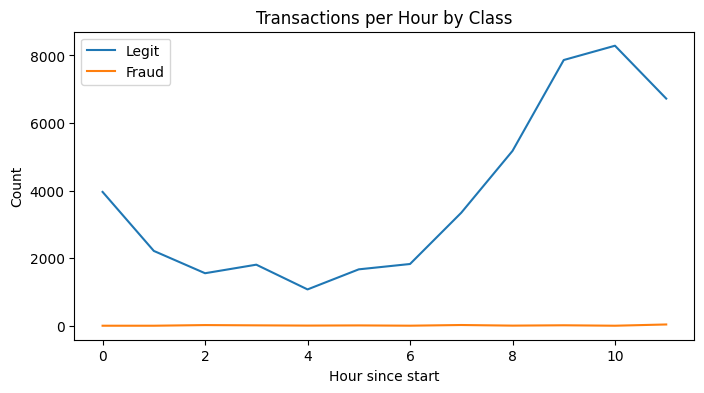

In [12]:
df['Hour'] = (df['Time'] // 3600).astype(int)
hourly = df.groupby(['Hour','Class']).size().unstack(fill_value=0)
plt.figure(figsize=(8,4))
plt.plot(hourly.index, hourly[0], label='Legit')
plt.plot(hourly.index, hourly[1], label='Fraud')
plt.title('Transactions per Hour by Class')
plt.xlabel('Hour since start')
plt.ylabel('Count')
plt.legend()
plt.show()

## 9. Correlation Heatmap of Top Features

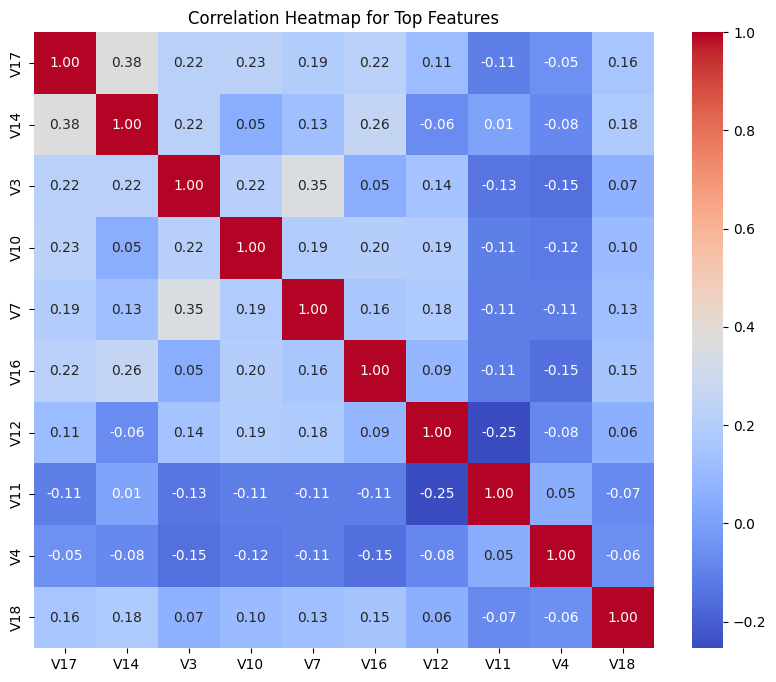

In [13]:
# Compute correlations for top features
top_feats = top10.index.tolist()  # from earlier cell
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_feats].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for Top Features')
plt.show()

## 10. Pairplot of Key Features

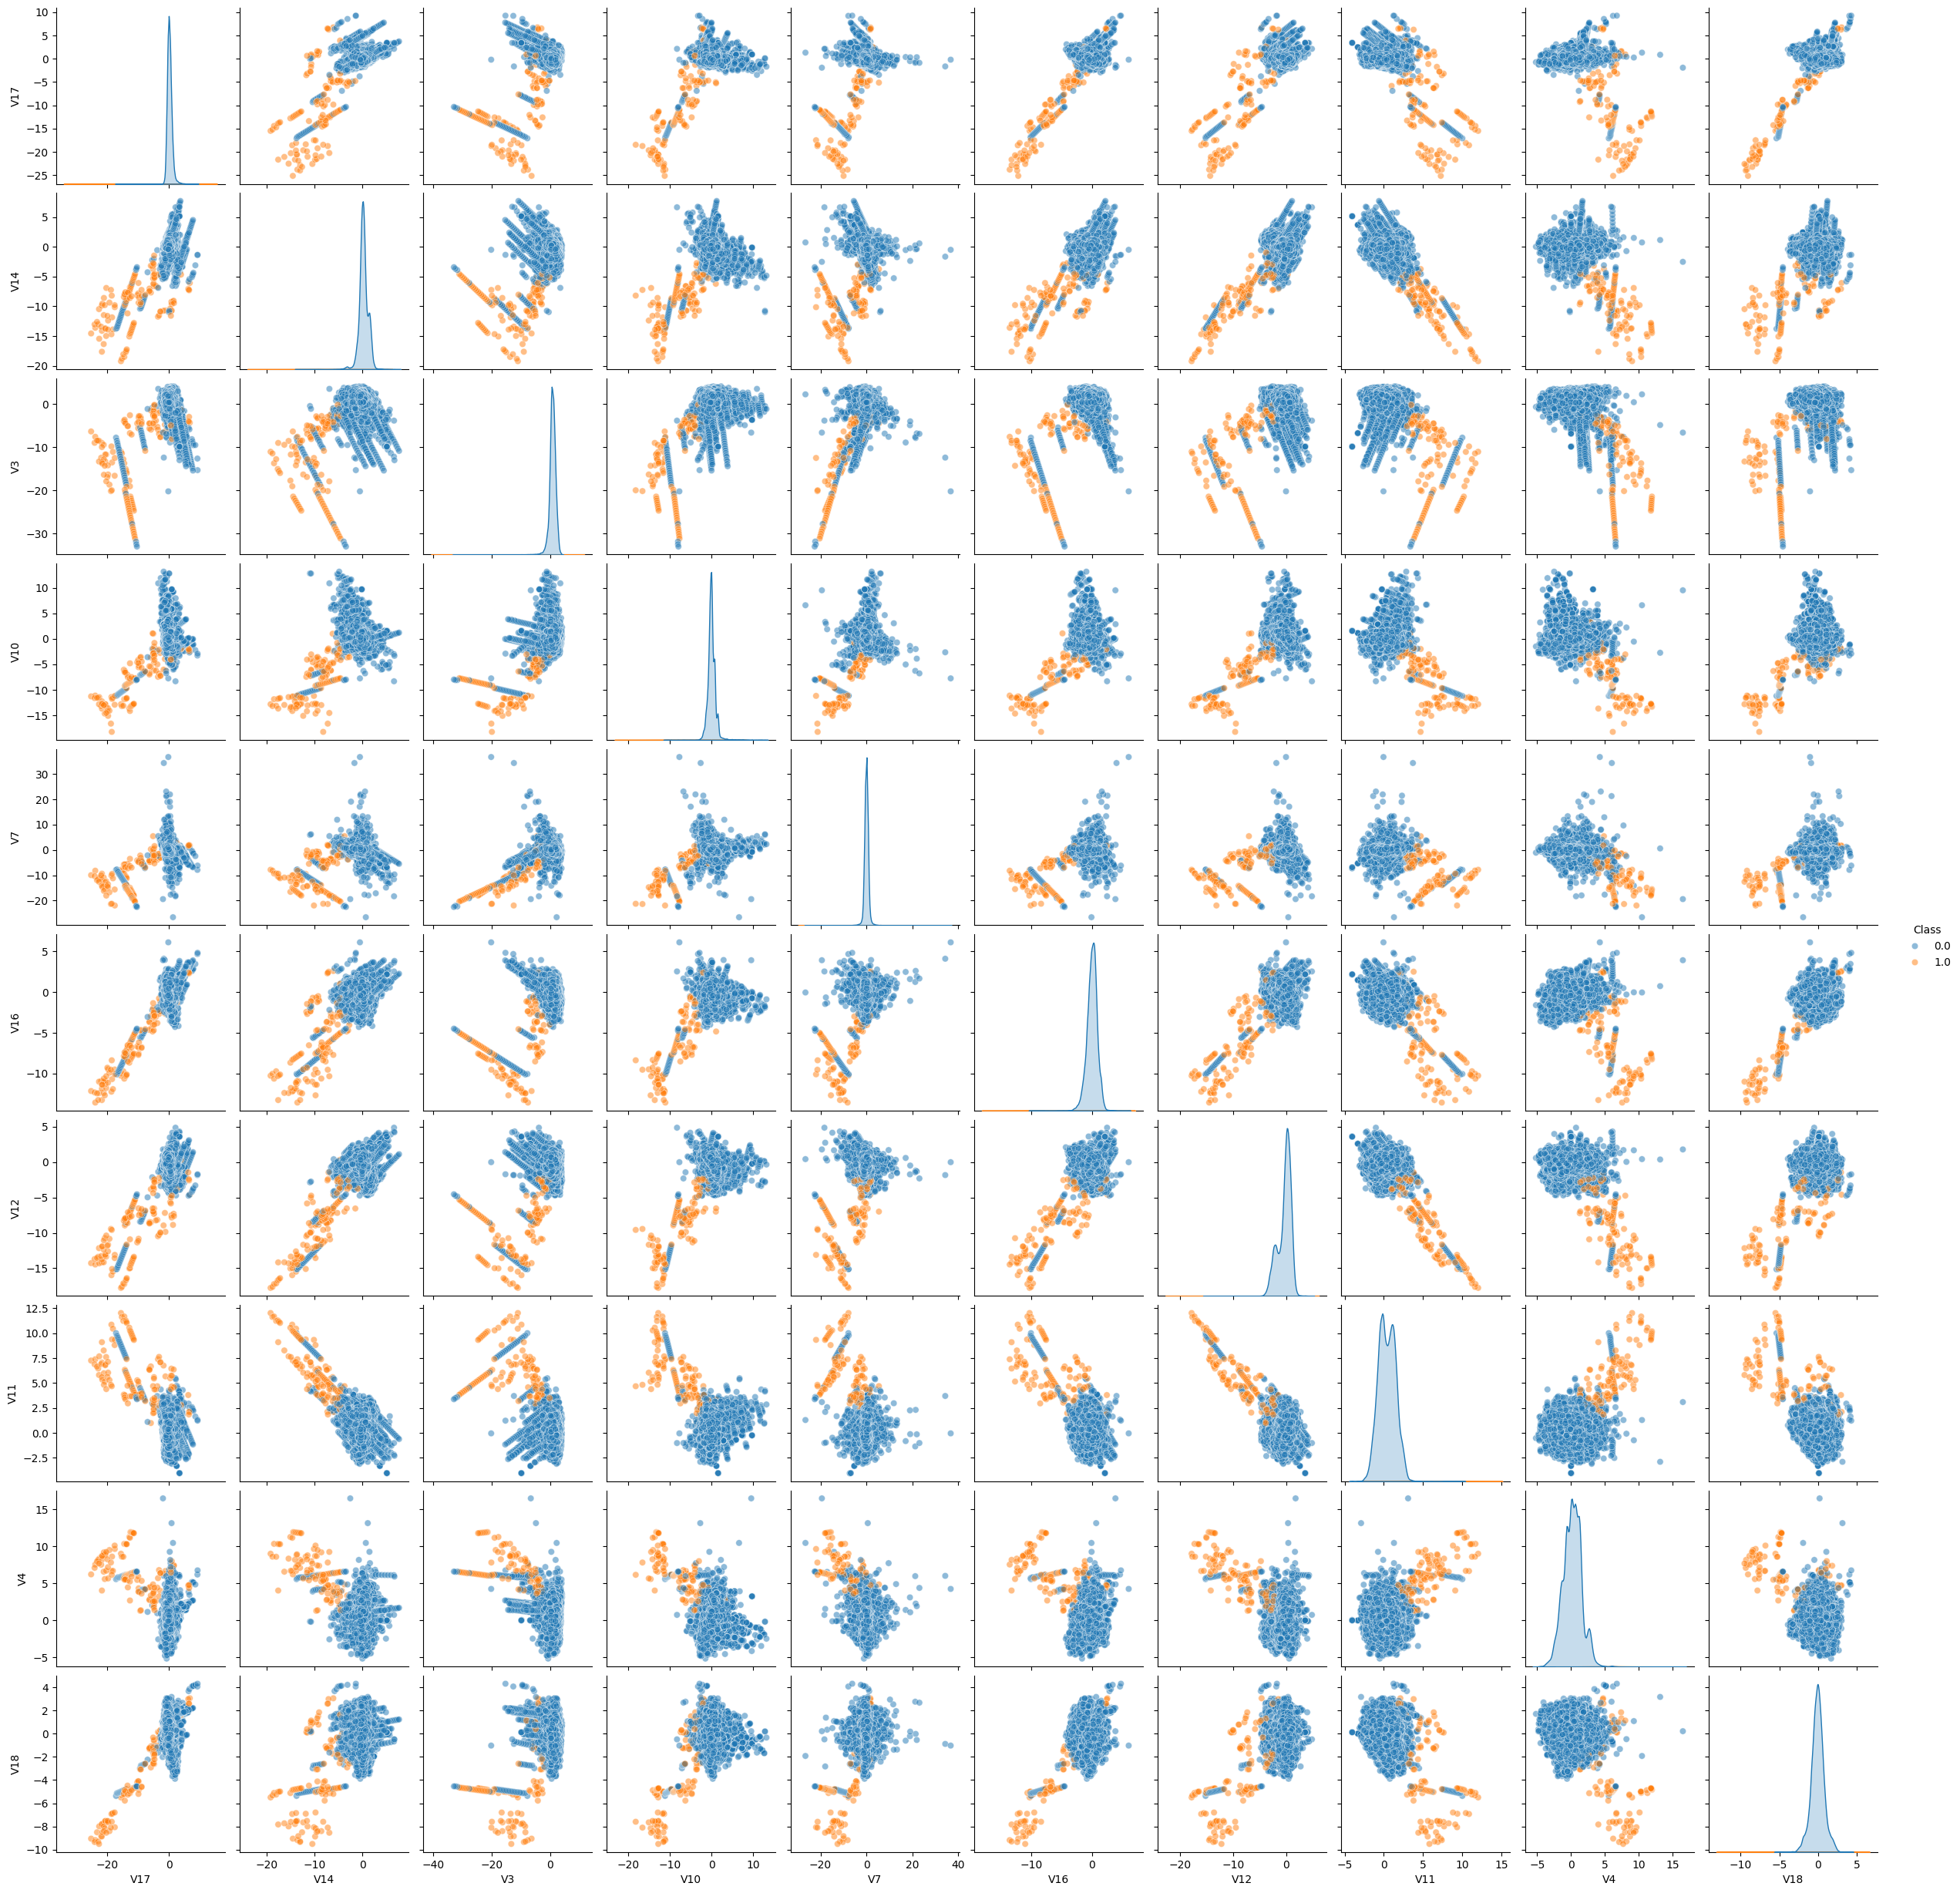

In [14]:
# Pairplot for top features to explore interactions
sns.pairplot(df[top_feats + ['Class']], hue='Class', vars=top_feats, plot_kws={'alpha':0.5}, diag_kind='kde')
plt.show()

## 11. Scatter Plot: Log(Amount) vs V17 by Class

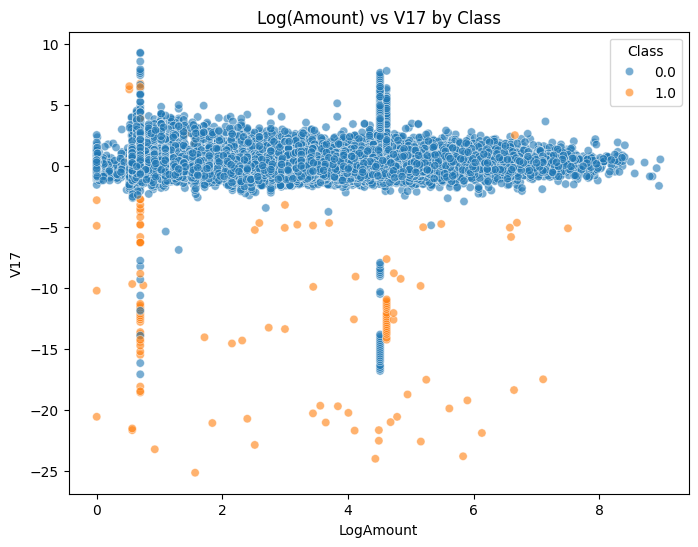

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LogAmount', y='V17', hue='Class', data=df, alpha=0.6)
plt.title('Log(Amount) vs V17 by Class')
plt.show()

## 12. Cumulative Fraud Transactions Over Time

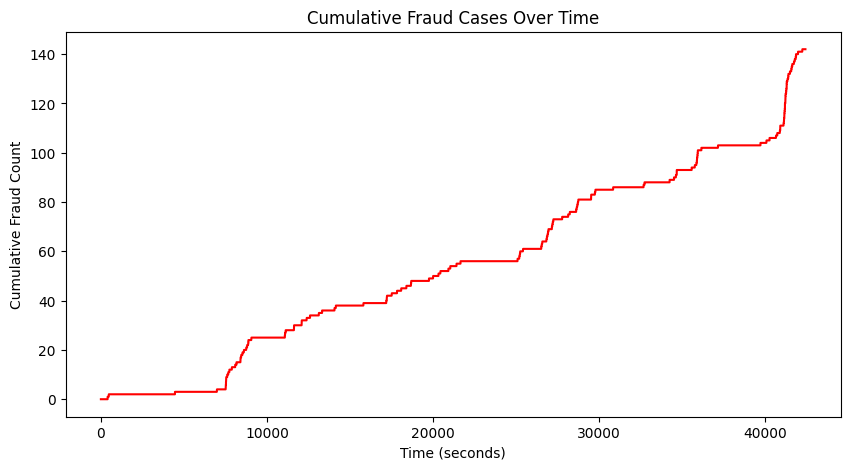

In [16]:
# Cumulative sum of fraud cases over time
df_sorted = df.sort_values('Time')
df_sorted['CumulativeFraud'] = df_sorted['Class'].cumsum()
plt.figure(figsize=(10, 5))
plt.plot(df_sorted['Time'], df_sorted['CumulativeFraud'], color='red')
plt.title('Cumulative Fraud Cases Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Cumulative Fraud Count')
plt.show()

## 13. Feature Interaction: V14 vs V17 Colored by Class

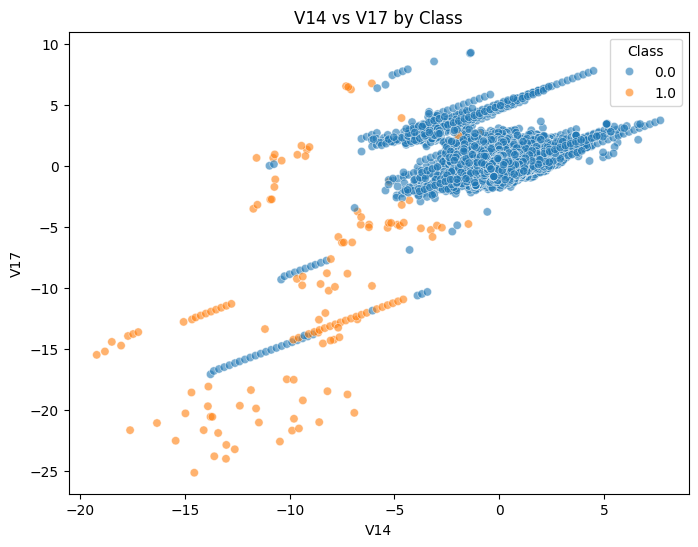

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='V14', y='V17', hue='Class', data=df, alpha=0.6)
plt.title('V14 vs V17 by Class')
plt.show()

## 14. Fraud Rate by Transaction Amount Bins

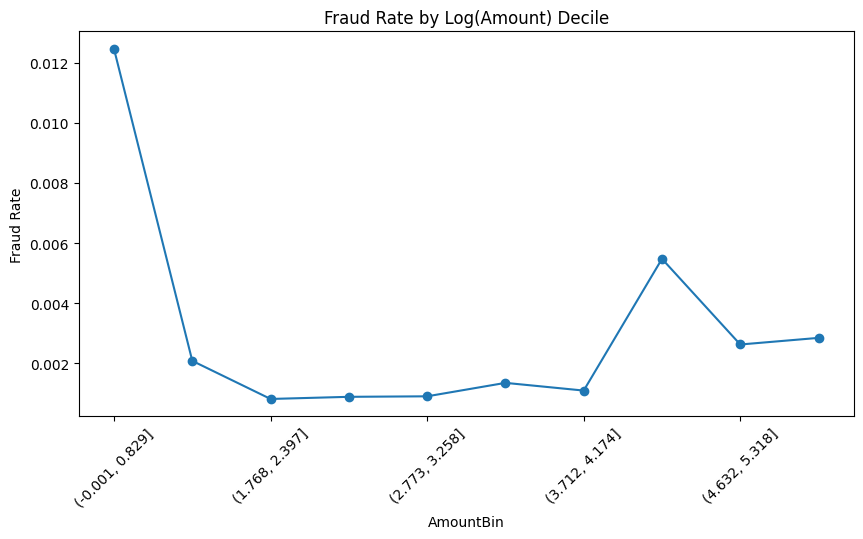

In [18]:
# Create bins for LogAmount and compute fraud rate
df['AmountBin'] = pd.qcut(df['LogAmount'], q=10)
bin_rates = df.groupby('AmountBin',observed=True)['Class'].mean()
plt.figure(figsize=(10,5))
bin_rates.plot(marker='o')
plt.title('Fraud Rate by Log(Amount) Decile')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

## 15. Hour-of-Day Fraud Rate

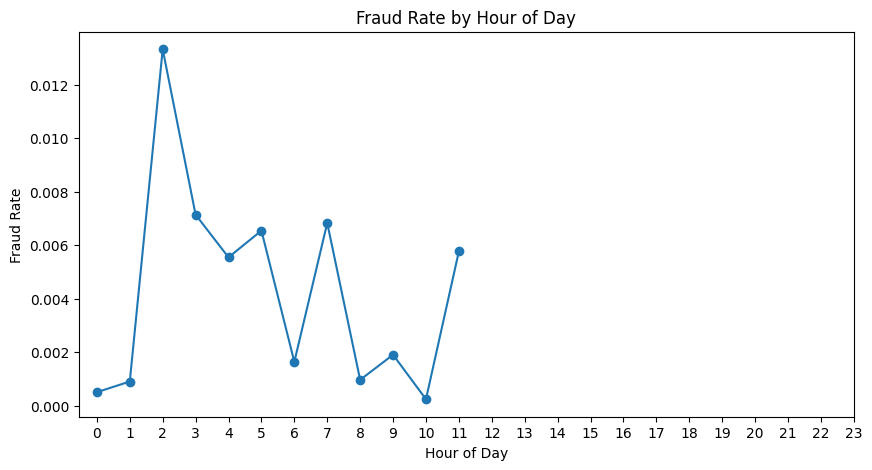

In [19]:
# Convert to hour of day and compute fraud rate
df['Hour24'] = ((df['Time'] // 3600) % 24).astype(int)
hourly_rate = df.groupby('Hour24')['Class'].mean()
plt.figure(figsize=(10,5))
hourly_rate.plot(marker='o')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.xticks(range(0,24))
plt.show()

## 16. PCA Projection of Transactions

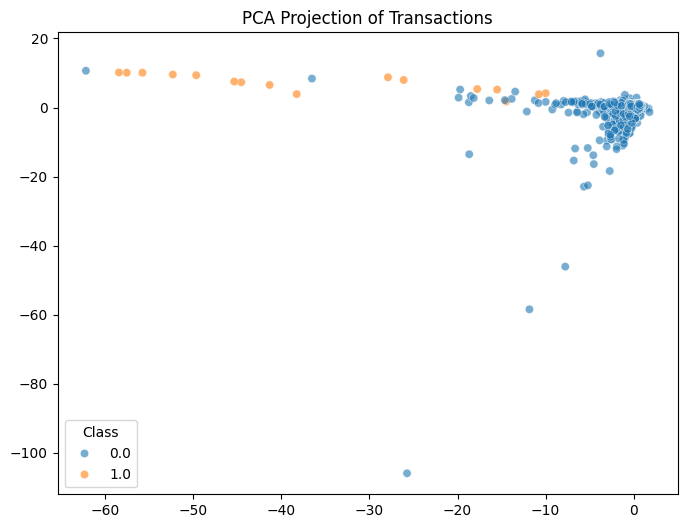

In [20]:
from sklearn.decomposition import PCA
# Sample for performance
sample = df.sample(n=5000, random_state=42)
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(sample[[f'V{i}' for i in range(1,29)]])
plt.figure(figsize=(8,6))
sns.scatterplot(x=coords[:,0], y=coords[:,1], hue=sample['Class'], alpha=0.6)
plt.title('PCA Projection of Transactions')
plt.show()

## 17. t-SNE Projection of Transactions

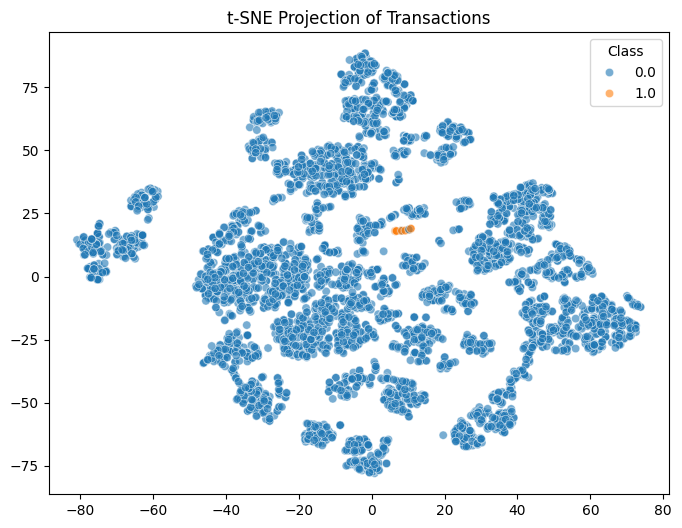

In [21]:
from sklearn.manifold import TSNE
# Sample subset for performance
sample = df.sample(n=5000, random_state=42)
features = sample[[f'V{i}' for i in range(1,29)]].values
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
coords = tsne.fit_transform(features)
plt.figure(figsize=(8,6))
sns.scatterplot(x=coords[:,0], y=coords[:,1], hue=sample['Class'], alpha=0.6)
plt.title('t-SNE Projection of Transactions')
plt.show()

## 18. Violin Plots of Key Features by Class

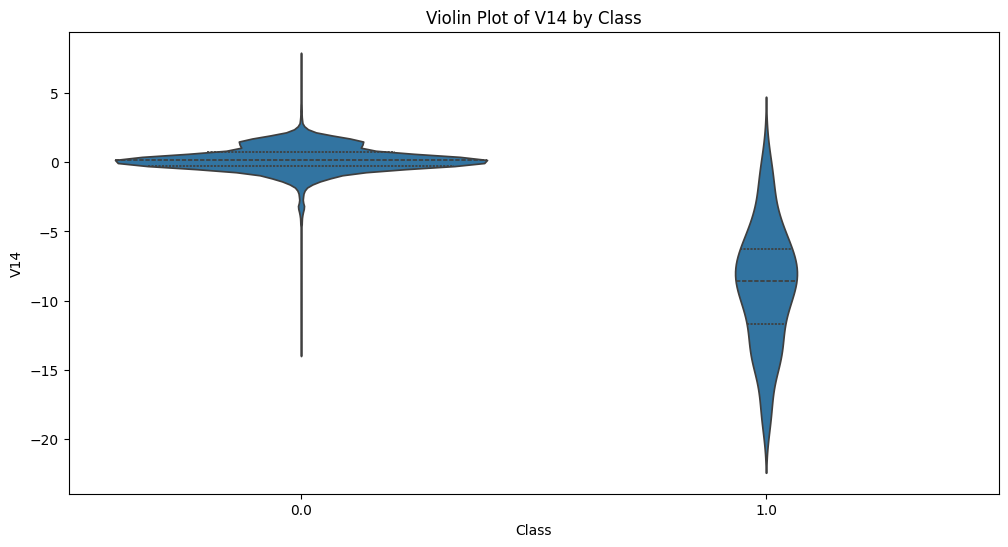

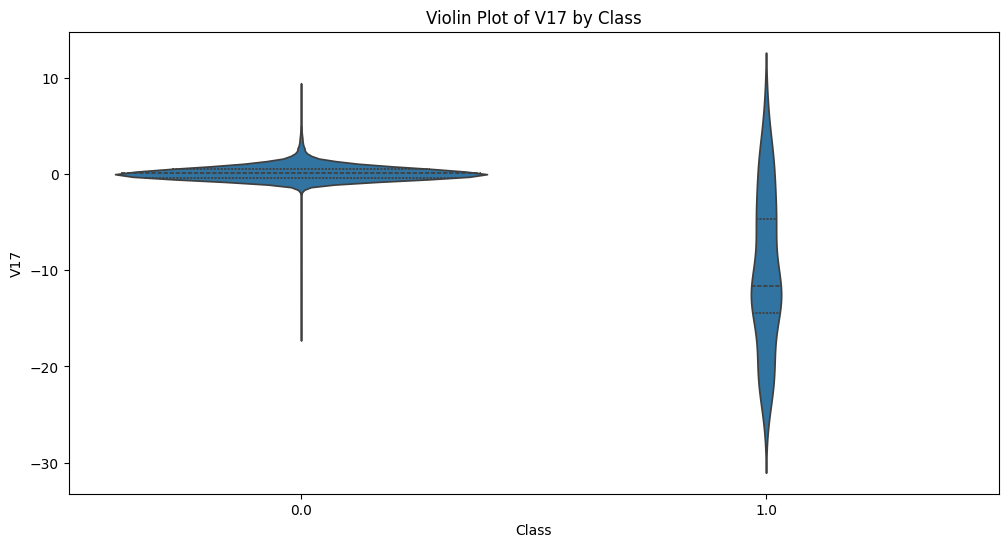

In [22]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Class', y='V14', data=df, inner='quartile')
plt.title('Violin Plot of V14 by Class')
plt.show()
plt.figure(figsize=(12,6))
sns.violinplot(x='Class', y='V17', data=df, inner='quartile')
plt.title('Violin Plot of V17 by Class')
plt.show()

## 19. Anomaly Score Distribution (Isolation Forest)

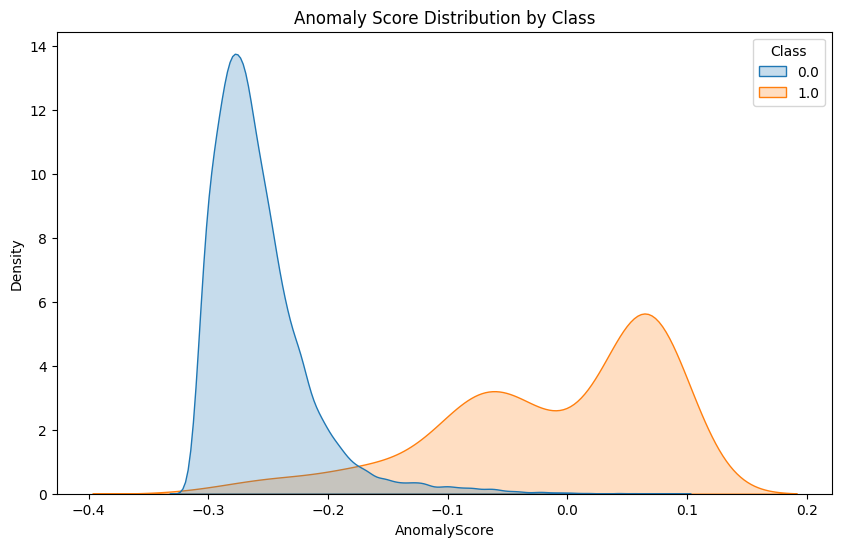

In [23]:
from sklearn.ensemble import IsolationForest
# Fit Isolation Forest on features + engineered columns
features = df[[f'V{i}' for i in range(1,29)] + ['LogAmount', 'Time']]
iso = IsolationForest(n_estimators=100, contamination=df['Class'].mean(), random_state=42)
iso.fit(features)
df['AnomalyScore'] = -iso.decision_function(features)
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='AnomalyScore', hue='Class', fill=True, common_norm=False)
plt.title('Anomaly Score Distribution by Class')
plt.show()

ROC and Precision Recall Curve for Isolation Forest

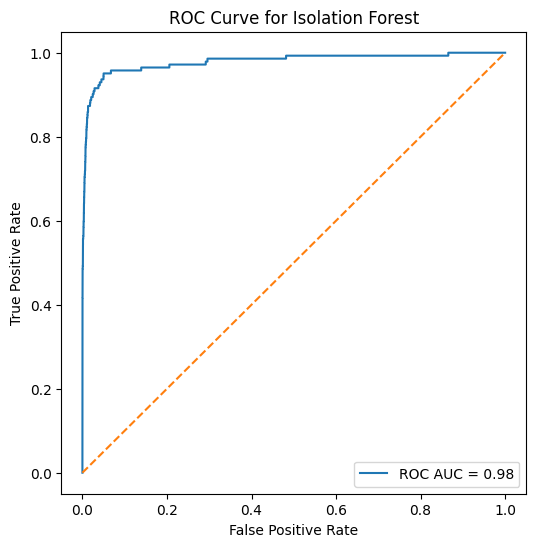

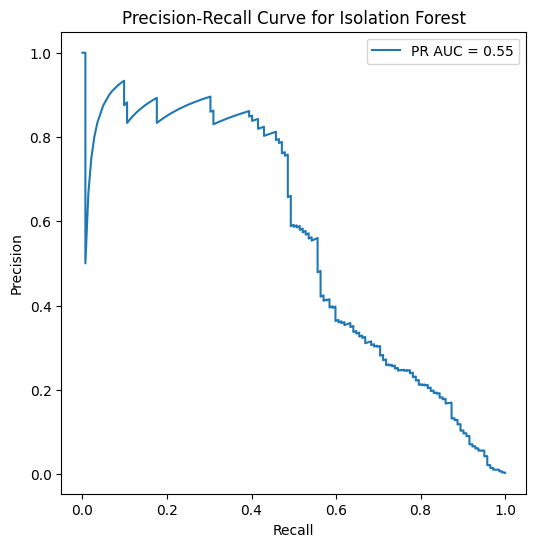

In [24]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import pandas as pd # Ensure pandas is imported if not already in the cell

# Check for and handle missing values in the columns used for metrics
# Although the error pointed to 'Class', let's check both just to be safe,
# assuming 'AnomalyScore' is the more likely source of recent NaNs.
df_metrics = df[['Class', 'AnomalyScore']].dropna()

# Extract the cleaned true labels and anomaly scores
y_true_metrics = df_metrics['Class']
y_score_metrics = df_metrics['AnomalyScore']

# Check if any data remains after dropping NaNs
if y_true_metrics.empty:
    print("Error: No non-NaN data remaining for metric calculation after dropping NaNs.")
else:
    # ROC Curve
    # Use the cleaned data for the calculation
    fpr, tpr, _ = roc_curve(y_true_metrics, y_score_metrics)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
    plt.plot([0,1],[0,1],'--')
    plt.title('ROC Curve for Isolation Forest')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Precision-Recall Curve
    # Use the cleaned data for the calculation
    precision, recall, _ = precision_recall_curve(y_true_metrics, y_score_metrics)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(6,6))
    plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
    plt.title('Precision-Recall Curve for Isolation Forest')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

## Data Cleaning
Remove duplicates and impute any missing values.

In [25]:
import pandas as pd
# Drop duplicate transactions
df.drop_duplicates(inplace=True)
# Check and fill missing values (forward-fill)
df.ffill(inplace=True)
# Verify no missing values remain
print('Missing values after cleaning:')
print(df.isnull().sum())

Missing values after cleaning:
Time            0
V1              0
V2              0
V3              0
V4              0
V5              0
V6              0
V7              0
V8              0
V9              0
V10             0
V11             0
V12             0
V13             0
V14             0
V15             0
V16             0
V17             0
V18             0
V19             0
V20             0
V21             0
V22             0
V23             0
V24             0
V25             0
V26             0
V27             0
V28             0
Amount          0
Class           0
LogAmount       0
Hour            0
AmountBin       0
Hour24          0
AnomalyScore    0
dtype: int64


## Outlier Analysis
Identify and quantify outliers using the IQR method.

In [26]:
import numpy as np
import pandas as pd
numeric_cols = df.select_dtypes(include=[np.number]).drop(columns=['Class']).columns
outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    is_outlier = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    outlier_summary[col] = int(is_outlier.sum())
pd.Series(outlier_summary).sort_values(ascending=False).head(10)

V28       8384
V27       6537
Amount    4809
V20       4496
V8        4232
V6        3855
V23       3538
V21       2952
V5        2835
V2        2463
dtype: int64

## Feature Engineering
Create new time-based and amount-based features.

In [27]:
import pandas as pd
import numpy as np
# Extract hour and minute of day from Time (seconds)
df['Hour_of_Day'] = ((df['Time'] // 3600) % 24).astype(int)
df['Minute_of_Hour'] = ((df['Time'] % 3600) // 60).astype(int)
# Create amount bins (deciles)
df['Amount_Decile'] = pd.qcut(df['LogAmount'], 10, labels=False)
# Interaction feature example: V1 + V2
df['V1_plus_V2'] = df['V1'] + df['V2']
# Display new feature overview
df[['Hour_of_Day','Minute_of_Hour','Amount_Decile','V1_plus_V2']].head()

Hour_of_Day  Minute_of_Hour  Amount_Decile  V1_plus_V2
0            0               0              8   -1.432588
1            0               0              1    1.458008
2            0               0              9   -2.698517
3            0               0              8   -1.151498
4            0               0              7   -0.280496

## 21. Baseline Classification Model
We select **Logistic Regression** as a baseline classifier for fraud detection due to its simplicity and interpretability.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Prepare data
# Exclude columns that are interval types or derived analysis results not suitable for direct model input
columns_to_drop = ['Class', 'AmountBin', 'Hour', 'Hour24', 'Hour_of_Day', 'Minute_of_Hour', 'Amount_Decile', 'AnomalyScore']

# Only drop columns if they exist in the dataframe to avoid errors
existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns]

X = df.drop(columns=existing_cols_to_drop)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train baseline model
# Increased max_iter to allow the solver more steps to converge, and using scaled data
baseline = LogisticRegression(max_iter=5000, class_weight='balanced', random_state=42)
# Fit on the scaled training data
baseline.fit(X_train_scaled, y_train)

# Predictions & scores
# Predict using the scaled test data
y_pred = baseline.predict(X_test_scaled)
y_proba = baseline.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print('Classification Report:')
print(classification_report(y_test, y_pred, digits=4))
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9998    0.9854    0.9926      9062
         1.0     0.1646    0.9286    0.2796        28

    accuracy                         0.9853      9090
   macro avg     0.5822    0.9570    0.6361      9090
weighted avg     0.9972    0.9853    0.9904      9090

ROC-AUC Score: 0.9918


In [29]:
# perform SMOTE and determine if that would improve the success rate

!pip install -q imbalanced-learn

from imblearn.over_sampling import SMOTE

# Re-split data before applying SMOTE
X = df.drop(columns=existing_cols_to_drop)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale the SMOTE-resampled training data and the original test data
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model on SMOTE data
smote_model = LogisticRegression(max_iter=5000, class_weight='balanced', random_state=42) # Keep class_weight 'balanced' as it often helps even with SMOTE, though experiment is needed
smote_model.fit(X_train_smote_scaled, y_train_smote)

# Predictions & scores using the original scaled test data
y_pred_smote = smote_model.predict(X_test_scaled)
y_proba_smote = smote_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print('Classification Report (After SMOTE):')
print(classification_report(y_test, y_pred_smote, digits=4))
roc_auc_smote = roc_auc_score(y_test, y_proba_smote)
print(f'ROC-AUC Score (After SMOTE): {roc_auc_smote:.4f}')

# Determine if SMOTE helped
print("\nComparison:")
print(f"Baseline ROC-AUC: {roc_auc:.4f}")
print(f"SMOTE ROC-AUC:    {roc_auc_smote:.4f}")

# Analyze classification report metrics, especially Precision, Recall, and F1-score for the minority class (class 1).
# Look for improvements in Recall for class 1, as SMOTE is designed to help the model identify minority class instances better.
# Check if the model can maintain reasonable Precision after SMOTE.
# Compare F1-scores for class 1.
# Consider the trade-offs. Sometimes improving Recall might decrease Precision.
# The ROC-AUC and PR-AUC (Precision-Recall AUC, which you might want to compute after SMOTE as well) are good overall metrics for imbalanced datasets.

# Based on the comparison printed above and a detailed look at the classification reports (specifically the metrics for class 1),
# you can determine if SMOTE had a positive impact on the model's performance, particularly its ability to detect fraud.
# A significant increase in the recall for class 1 with a stable or acceptable precision often indicates that SMOTE was helpful.

Classification Report (After SMOTE):
              precision    recall  f1-score   support

         0.0     0.9998    0.9956    0.9977      9062
         1.0     0.3939    0.9286    0.5532        28

    accuracy                         0.9954      9090
   macro avg     0.6969    0.9621    0.7754      9090
weighted avg     0.9979    0.9954    0.9963      9090

ROC-AUC Score (After SMOTE): 0.9807

Comparison:
Baseline ROC-AUC: 0.9918
SMOTE ROC-AUC:    0.9807


### Evaluation Metric Selection & Rationale
- **ROC-AUC**: Measures the classifier’s ability to distinguish fraud vs. legitimate transactions across thresholds. Well-suited for imbalanced datasets because it is insensitive to class proportions.
- **F1-score**: Harmonic mean of precision and recall, balancing false positives and false negatives. Important when both fraud detection sensitivity and precision matter.

In [30]:
# compare the dataset using logistic regression vs random forest and analyze the model performance and select the best

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression # Assuming you have already imported and trained Logistic Regression model named `baseline`

# Train Random Forest model
# RandomForestClassifier doesn't have `class_weight='balanced'` in the same way as LogisticRegression,
# but you can adjust `n_estimators` for complexity and `random_state` for reproducibility.
# The 'balanced_subsample' option can be used for class weighting.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced_subsample', n_jobs=-1)
# Fit on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Predictions & scores for Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation for Random Forest
print('\n--- Random Forest Model Evaluation ---')
print('Classification Report:')
print(classification_report(y_test, y_pred_rf, digits=4))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f'ROC-AUC Score: {roc_auc_rf:.4f}')

# --- Model Performance Analysis and Selection ---



print('\n--- Model Comparison ---')
print(f'Logistic Regression ROC-AUC: {roc_auc:.4f}')
print(f'Random Forest ROC-AUC: {roc_auc_rf:.4f}')

# Analyze classification reports and ROC-AUC scores
print('\n--- Analysis ---')
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred, digits=4))

print('\nRandom Forest Classification Report:')
print(classification_report(y_test, y_pred_rf, digits=4))

print('\n--- Model Selection ---')


if roc_auc_rf > roc_auc:
    print('Based on ROC-AUC, Random Forest appears to perform better.')
    # Further analysis: Check precision, recall, F1-score for class 1
    report_lr = classification_report(y_test, y_pred, digits=4, output_dict=True)
    report_rf = classification_report(y_test, y_pred_rf, digits=4, output_dict=True)

    # Use '1.0' as the key instead of '1'
    print(f"Logistic Regression Class 1 F1-score: {report_lr['1.0']['f1-score']:.4f}")
    print(f"Random Forest Class 1 F1-score: {report_rf['1.0']['f1-score']:.4f}")

    # Decision logic (can be adjusted based on priorities for this problem - e.g., minimize false negatives?)
    if report_rf['1.0']['f1-score'] > report_lr['1.0']['f1-score']:
        print("Random Forest also has a higher F1-score for the fraud class.")
        print("Considering both ROC-AUC and F1-score for the minority class, Random Forest is the better performing model in this comparison.")
        best_model = rf_model
        best_model_name = "Random Forest"
    else:
        print("Random Forest has a higher ROC-AUC, but Logistic Regression has a higher F1-score for the fraud class.")
        print("The choice depends on whether overall discrimination (ROC-AUC) or balanced precision/recall for fraud (F1-score) is more critical.")
        # For highly imbalanced data like fraud, F1-score on the minority class is often a key metric.
        print("Given the imbalance, prioritizing the model with the better F1-score for the fraud class (Logistic Regression) might be preferable.")
        best_model = baseline
        best_model_name = "Logistic Regression"


elif roc_auc > roc_auc_rf:
    print('Based on ROC-AUC, Logistic Regression appears to perform better.')
    report_lr = classification_report(y_test, y_pred, digits=4, output_dict=True)
    report_rf = classification_report(y_test, y_pred_rf, digits=4, output_dict=True)

    # Use '1.0' as the key instead of '1'
    print(f"Logistic Regression Class 1 F1-score: {report_lr['1.0']['f1-score']:.4f}")
    print(f"Random Forest Class 1 F1-score: {report_rf['1.0']['f1-score']:.4f}")

    if report_lr['1.0']['f1-score'] >= report_rf['1.0']['f1-score']:
        print("Logistic Regression also has a higher or equal F1-score for the fraud class.")
        print("Considering both ROC-AUC and F1-score for the minority class, Logistic Regression is the better performing model in this comparison.")
        best_model = baseline
        best_model_name = "Logistic Regression"
    else:
         print("Logistic Regression has a higher ROC-AUC, but Random Forest has a higher F1-score for the fraud class.")
         print("The choice depends on whether overall discrimination (ROC-AUC) or balanced precision/recall for fraud (F1-score) is more critical.")
         # For highly imbalanced data like fraud, F1-score on the minority class is often a key metric.
         print("Given the imbalance, prioritizing the model with the better F1-score for the fraud class (Random Forest) might be preferable.")
         best_model = rf_model
         best_model_name = "Random Forest"

else:
    print('Both models have very similar ROC-AUC scores.')
    report_lr = classification_report(y_test, y_pred, digits=4, output_dict=True)
    report_rf = classification_report(y_test, y_pred_rf, digits=4, output_dict=True)

    # Use '1.0' as the key instead of '1'
    print(f"Logistic Regression Class 1 F1-score: {report_lr['1.0']['f1-score']:.4f}")
    print(f"Random Forest Class 1 F1-score: {report_rf['1.0']['f1-score']:.4f}")
    if report_rf['1.0']['f1-score'] > report_lr['1.0']['f1-score']:
         print("However, Random Forest has a higher F1-score for the fraud class.")
         print("Given the imbalance and similar ROC-AUC, Random Forest is selected as the better model.")
         best_model = rf_model
         best_model_name = "Random Forest"
    else:
         print("However, Logistic Regression has a higher or equal F1-score for the fraud class.")
         print("Given the imbalance and similar ROC-AUC, Logistic Regression is selected as the better model.")
         best_model = baseline
         best_model_name = "Logistic Regression"

print(f"\nSelected Best Model: {best_model_name}")


--- Random Forest Model Evaluation ---
Classification Report:
              precision    recall  f1-score   support

         0.0     0.9969    1.0000    0.9985      9062
         1.0     0.0000    0.0000    0.0000        28

    accuracy                         0.9969      9090
   macro avg     0.4985    0.5000    0.4992      9090
weighted avg     0.9938    0.9969    0.9954      9090

ROC-AUC Score: 0.7853

--- Model Comparison ---
Logistic Regression ROC-AUC: 0.9918
Random Forest ROC-AUC: 0.7853

--- Analysis ---
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0     0.9998    0.9854    0.9926      9062
         1.0     0.1646    0.9286    0.2796        28

    accuracy                         0.9853      9090
   macro avg     0.5822    0.9570    0.6361      9090
weighted avg     0.9972    0.9853    0.9904      9090


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

## Hyperparameter Tuning with GridSearchCV

We will now tune hyperparameters for two classifiers using the SMOTE-resampled training data:
1. Random Forest Classifier  
2. Logistic Regression  

We'll use `GridSearchCV` with F1 as the scoring metric and then evaluate the best models on the test set.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Ensure X_train_res, y_train_res, X_test, y_test are defined
# If not, uncomment and adjust the following lines:
# X = data.drop('Class', axis=1)
# y = data['Class']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define parameter grids
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Random Forest Grid Search
rf = RandomForestClassifier(random_state=42)
# Use X_train_smote and y_train_smote which were created in the previous cell
rf_grid = GridSearchCV(rf, rf_param_grid, cv=3, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train_smote, y_train_smote)
print("✅ Random Forest Best Params:", rf_grid.best_params_)
print("✅ RF Best CV F1 Score:", rf_grid.best_score_)

# Logistic Regression Grid Search
lr = LogisticRegression(random_state=42, max_iter=1000)
# Use X_train_smote and y_train_smote which were created in the previous cell
lr_grid = GridSearchCV(lr, lr_param_grid, cv=3, scoring='f1', n_jobs=-1)
lr_grid.fit(X_train_smote, y_train_smote)
print("✅ Logistic Regression Best Params:", lr_grid.best_params_)
print("✅ LR Best CV F1 Score:", lr_grid.best_score_)

# Evaluate on Test Set
best_rf = rf_grid.best_estimator_
best_lr = lr_grid.best_estimator_

print("\n--- Test Set Evaluation: Random Forest ---")
# Use the original scaled test data for evaluation
y_pred_rf = best_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\n--- Test Set Evaluation: Logistic Regression ---")
# Use the original scaled test data for evaluation
y_pred_lr = best_lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))